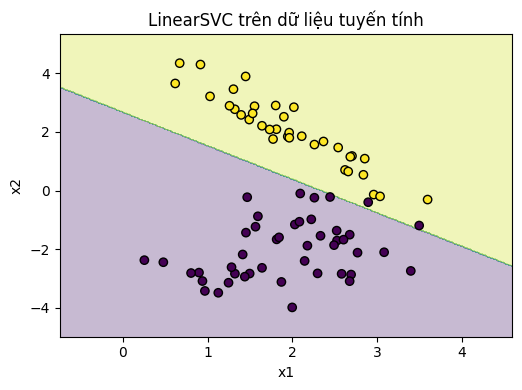

test data: 0.975
train data: 0.975


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

X_lin, y_lin = make_classification(
    n_samples=400,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=42
)

X_test, X_train = train_test_split(X_lin, test_size=0.8, random_state=42);
y_test, y_train = train_test_split(y_lin, test_size=0.8, random_state=42);

clf_lin = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1.0, loss="hinge", max_iter=10000)
)
clf_lin.fit(X_test, y_test)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plot_decision_boundary(clf_lin, X_test, y_test,
                       "LinearSVC trên dữ liệu tuyến tính")
plt.tight_layout()
plt.show()

print("test data:", clf_lin.score(X_test, y_test))
print("train data:", clf_lin.score(X_train, y_train))




